# Лабораторная работа №4

ФИО:   
Группа:

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Пример импорта данных. Грузим данные

In [ ]:
import pandas as pd

# Загрузка датасета (укажите правильный путь к файлу insurance.csv)
data = pd.read_csv('./data/insurance.csv')
print("Данные успешно загружены.")
print(f"Размер датасета: {data.shape}")
data.head()

Данные успешно загружены.
Размер датасета: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Понимаем, какая перед нами задача

In [3]:
# Целевая переменная
target = 'charges'

# Проверяем тип задачи
print(f"Целевая переменная: {target}")
print(f"Пример значений: {data[target].unique()[:5]}")  # Показываем первые 5 уникальных

# Поскольку charges - непрерывная величина, это регрессия
print("Задача: регрессия")

Целевая переменная: charges
Пример значений: [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]
Задача: регрессия


## 3. Делаем предобработку данных

In [4]:
from sklearn.model_selection import train_test_split

# Удаляем ненужные столбцы (если есть, но в этом датасете все нужны)
X = data.drop(columns=[target])
y = data[target]

# Разделяем выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

print("Пропуски в train:")
print(X_train.isnull().sum())
print("\nПропуски в test:")
print(X_test.isnull().sum())

# Определяем числовые и категориальные признаки
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

from sklearn.impute import SimpleImputer

# Числовые — среднее (в этом датасете пропусков нет, но на всякий случай)
num_imputer = SimpleImputer(strategy='mean')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

# Категориальные — мода
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

print("Пропуски заполнены (если были).")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

print("Числовые признаки отмасштабированы (StandardScaler).")

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

# Преобразуем в DataFrame
X_train_cat = pd.DataFrame(X_train_cat, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_cat = pd.DataFrame(X_test_cat, columns=encoder.get_feature_names_out(), index=X_test.index)

# Объединяем
X_train = pd.concat([X_train[num_features].reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test[num_features].reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

print("Категориальные признаки закодированы (OneHot).")
print(f"Итоговый размер: {X_train.shape}")

Train: (1070, 6), Test: (268, 6)
Пропуски в train:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

Пропуски в test:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64
Пропуски заполнены (если были).
Числовые признаки отмасштабированы (StandardScaler).
Категориальные признаки закодированы (OneHot).
Итоговый размер: (1070, 8)


## 4. Оформляем данные в Dataset и Dataloader

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Класс Dataset
class InsuranceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)  # Для регрессии - 1D -> 2D

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Создаем датасеты
train_dataset = InsuranceDataset(X_train, y_train)
test_dataset = InsuranceDataset(X_test, y_test)

# Dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Данные оформлены в Dataset и Dataloader.")

Данные оформлены в Dataset и Dataloader.


## 5. Обучение моделей

In [6]:
import torch.nn as nn
import torch.optim as optim

# Простая модель: input -> output
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Для регрессии - 1 выход

    def forward(self, x):
        return self.fc(x)

# Инициализация
input_size = X_train.shape[1]
simple_net = SimpleNet(input_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(simple_net.parameters(), lr=0.01)

# Обучение
num_epochs = 100
simple_train_losses = []
simple_test_losses = []

for epoch in range(num_epochs):
    simple_net.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = simple_net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    simple_train_losses.append(train_loss / len(train_loader))

    # Test loss
    simple_net.eval()
    test_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = simple_net(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()

    simple_test_losses.append(test_loss / len(test_loader))

print("Простая однослойная нейросеть с SGD обучена.")

Простая однослойная нейросеть с SGD обучена.


In [7]:
# Модель с 1 скрытым слоем
class MediumNet(nn.Module):
    def __init__(self, input_size):
        super(MediumNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# Инициализация
medium_net = MediumNet(input_size)
optimizer = optim.Adam(medium_net.parameters(), lr=0.001)

# Обучение
medium_train_losses = []
medium_test_losses = []

for epoch in range(num_epochs):
    medium_net.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = medium_net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    medium_train_losses.append(train_loss / len(train_loader))

    # Test loss
    medium_net.eval()
    test_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = medium_net(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()

    medium_test_losses.append(test_loss / len(test_loader))

print("Нейросеть с 1 скрытым слоем с Adam обучена.")

Нейросеть с 1 скрытым слоем с Adam обучена.


In [8]:
# Модель с 3 скрытыми слоями
class ComplexNet(nn.Module):
    def __init__(self, input_size):
        super(ComplexNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

# Инициализация
complex_net = ComplexNet(input_size)
optimizer = optim.Adam(complex_net.parameters(), lr=0.001)

# Обучение
complex_train_losses = []
complex_test_losses = []

for epoch in range(num_epochs):
    complex_net.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = complex_net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    complex_train_losses.append(train_loss / len(train_loader))

    # Test loss
    complex_net.eval()
    test_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = complex_net(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()

    complex_test_losses.append(test_loss / len(test_loader))

print("Нейросеть с 3 скрытыми слоями с Adam обучена.")

Нейросеть с 3 скрытыми слоями с Adam обучена.


## 6. Loss на train и test, визуализация learning curve

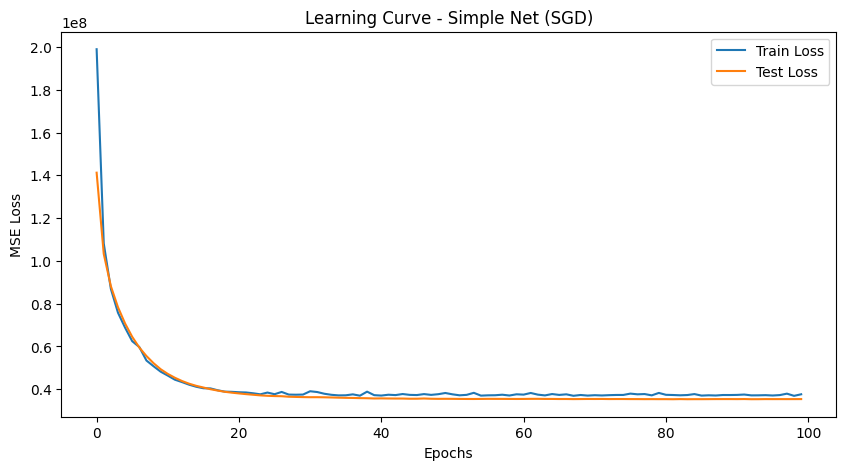

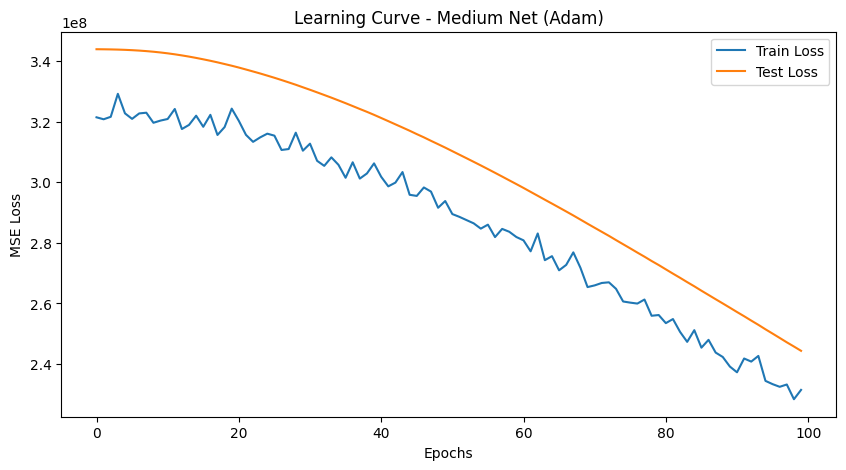

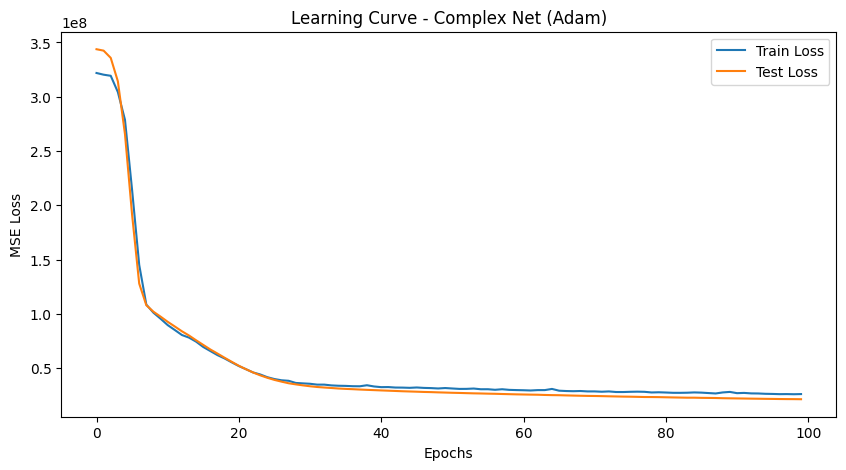

In [9]:
import matplotlib.pyplot as plt

# Визуализация для простой модели
plt.figure(figsize=(10, 5))
plt.plot(simple_train_losses, label='Train Loss')
plt.plot(simple_test_losses, label='Test Loss')
plt.title('Learning Curve - Simple Net (SGD)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Для средней модели
plt.figure(figsize=(10, 5))
plt.plot(medium_train_losses, label='Train Loss')
plt.plot(medium_test_losses, label='Test Loss')
plt.title('Learning Curve - Medium Net (Adam)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Для сложной модели
plt.figure(figsize=(10, 5))
plt.plot(complex_train_losses, label='Train Loss')
plt.plot(complex_test_losses, label='Test Loss')
plt.title('Learning Curve - Complex Net (Adam)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

## 7. Расчёт метрик (MAE для регрессии)

In [10]:
from sklearn.metrics import mean_absolute_error

def calculate_mae(model, loader, name):
    model.eval()
    preds = []
    trues = []
    with torch.no_grad():
        for batch_X, batch_y in loader:
            outputs = model(batch_X)
            preds.extend(outputs.numpy())
            trues.extend(batch_y.numpy())

    mae = mean_absolute_error(trues, preds)
    print(f"{name} MAE: {mae:.2f}")
    return mae

# Метрики для train и test
print("\nSimple Net:")
simple_train_mae = calculate_mae(simple_net, train_loader, "Train")
simple_test_mae = calculate_mae(simple_net, test_loader, "Test")

print("\nMedium Net:")
medium_train_mae = calculate_mae(medium_net, train_loader, "Train")
medium_test_mae = calculate_mae(medium_net, test_loader, "Test")

print("\nComplex Net:")
complex_train_mae = calculate_mae(complex_net, train_loader, "Train")
complex_test_mae = calculate_mae(complex_net, test_loader, "Test")


Simple Net:
Train MAE: 4215.06
Test MAE: 4192.78

Medium Net:
Train MAE: 10197.71
Test MAE: 9897.62

Complex Net:
Train MAE: 3022.38
Test MAE: 2844.67


1. Какая модель справилась лучше с поставленной задачей?
Complex Net
2. Имеет ли место переобучение?
Да, но умеренное.
- Complex Net: Train MAE = 3022 → Test MAE = 2844 → разница ~178 (небольшая).
- Simple Net: Train MAE = 4215 → Test MAE = 4192 → обобщение отличное, но модель слишком простая.
- Medium Net: Train MAE = 10197 → Test MAE = 9897 → разница мала, но ошибка огромная → модель не научилась.
3. Имеет ли место недообучение?
Да, ярко выражено в Medium Net.
- MAE ≈ 9900 — это почти в 3.5 раза хуже, чем у Complex Net.
- Модель с одним скрытым слоем (64 нейрона)не способна моделировать сложные взаимодействия (например, smoker * bmi, age * bmi).
- Simple Net тоже недообучается (MAE ≈ 4200), но лучше, чем Medium — возможно, из-за стабильности SGD.